In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime

In [2]:
# Create empty city_data 
city_data = []
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [7]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":77.61,"feels_like":78.6,"temp_min":72.88,"temp_max":81.07,"pressure":1010,"humidity":75},"visibility":10000,"wind":{"speed":6.49,"deg":273,"gust":18.54},"clouds":{"all":37},"dt":1659494874,"sys":{"type":2,"id":2001997,"country":"US","sunrise":1659433063,"sunset":1659484990},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 77.61,
  'feels_like': 78.6,
  'temp_min': 72.88,
  'temp_max': 81.07,
  'pressure': 1010,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 6.49, 'deg': 273, 'gust': 18.54},
 'clouds': {'all': 37},
 'dt': 1659494874,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1659433063,
  'sunset': 1659484990},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 77.61,
  'feels_like': 78.6,
  'temp_min': 72.88,
  'temp_max': 81.07,
  'pressure': 1010,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 6.49, 'deg': 273, 'gust': 18.54},
 'clouds': {'all': 37},
 'dt': 1659494874,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1659433063,
  'sunset': 1659484990},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
boston_data['sys']

{'type': 2,
 'id': 2001997,
 'country': 'US',
 'sunrise': 1659433063,
 'sunset': 1659484990}

In [17]:
boston_data['sys']['country']

'US'

In [18]:
boston_data['dt']

1659494874

In [19]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 81.07 75 37 6.49


In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-08-03 02:47:54'

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | daulatpur
Processing Record 5 of Set 1 | ondjiva
Processing Record 6 of Set 1 | scottsburgh
City not found. Skipping...
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | kununurra
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | mahajanga
Processing Record 16 of Set 1 | gizo
Processing Record 17 of Set 1 | lakes entrance
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | lius

Processing Record 38 of Set 4 | jumla
Processing Record 39 of Set 4 | husavik
Processing Record 40 of Set 4 | prince rupert
Processing Record 41 of Set 4 | khatanga
Processing Record 42 of Set 4 | iquitos
Processing Record 43 of Set 4 | kalmunai
Processing Record 44 of Set 4 | venado
Processing Record 45 of Set 4 | kiruna
Processing Record 46 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 47 of Set 4 | dikson
Processing Record 48 of Set 4 | khovu-aksy
Processing Record 49 of Set 4 | beloha
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | lorengau
Processing Record 2 of Set 5 | kiama
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | dwarka
Processing Record 6 of Set 5 | ubatuba
Processing Record 7 of Set 5 | vao
Processing Record 8 of Set 5 | kargasok
Processing Record 9 of Set 5 | miandrivazo
Processing Record 10 of Set 5 | santa maria
Processing Record 11 of Set 5 | kaita

Processing Record 28 of Set 8 | abengourou
Processing Record 29 of Set 8 | pudozh
Processing Record 30 of Set 8 | vila
Processing Record 31 of Set 8 | bend
Processing Record 32 of Set 8 | dukat
Processing Record 33 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 8 | maceio
Processing Record 35 of Set 8 | si bun ruang
Processing Record 36 of Set 8 | nabire
Processing Record 37 of Set 8 | norman wells
Processing Record 38 of Set 8 | pangody
Processing Record 39 of Set 8 | baykit
Processing Record 40 of Set 8 | santa cruz
Processing Record 41 of Set 8 | rio cuarto
Processing Record 42 of Set 8 | tuktoyaktuk
Processing Record 43 of Set 8 | puerto carreno
Processing Record 44 of Set 8 | logrono
Processing Record 45 of Set 8 | pontiac
Processing Record 46 of Set 8 | chuy
Processing Record 47 of Set 8 | datong
Processing Record 48 of Set 8 | san javier
Processing Record 49 of Set 8 | paamiut
Processing Record 50 of Set 8 | bolungarvik
City not found. Skipping...

Processing Record 17 of Set 12 | west bay
Processing Record 18 of Set 12 | morant bay
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | general roca
Processing Record 21 of Set 12 | mezhdurechensk
Processing Record 22 of Set 12 | poum
Processing Record 23 of Set 12 | nimaj
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | nyanguge
Processing Record 26 of Set 12 | kayiry
Processing Record 27 of Set 12 | sancti spiritus
Processing Record 28 of Set 12 | pangnirtung
Processing Record 29 of Set 12 | myitkyina
Processing Record 30 of Set 12 | visby
Processing Record 31 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 32 of Set 12 | richards bay
Processing Record 33 of Set 12 | juneau
Processing Record 34 of Set 12 | almenara
Processing Record 35 of Set 12 | quang ngai
Processing Record 36 of Set 12 | tulagi
Processing Record 37 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 38 of Set 12 | utiroa
City no

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,66.15,54,10,9.62,ZA,2022-08-03 02:48:23
1,Esperance,-33.8667,121.9000,55.24,56,38,33.91,AU,2022-08-03 02:50:04
2,Mahebourg,-20.4081,57.7000,68.29,83,40,3.44,MU,2022-08-03 02:50:05
3,Daulatpur,26.5015,67.9706,89.98,65,0,4.72,PK,2022-08-03 02:50:05
4,Ondjiva,-17.0667,15.7333,48.47,24,84,2.59,AO,2022-08-03 02:50:06
5,Hermanus,-34.4187,19.2345,49.80,86,9,1.99,ZA,2022-08-03 02:50:06
6,Kodiak,57.7900,-152.4072,67.51,45,0,33.38,US,2022-08-03 02:46:23
7,Atuona,-9.8000,-139.0333,77.40,75,12,13.49,PF,2022-08-03 02:50:07
8,Kununurra,-15.7667,128.7333,89.58,31,25,4.61,AU,2022-08-03 02:50:07
9,Bluff,-46.6000,168.3333,44.80,74,41,27.34,NZ,2022-08-03 02:48:25


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-08-03 02:48:23,-33.5906,26.8910,66.15,54,10,9.62
1,Esperance,AU,2022-08-03 02:50:04,-33.8667,121.9000,55.24,56,38,33.91
2,Mahebourg,MU,2022-08-03 02:50:05,-20.4081,57.7000,68.29,83,40,3.44
3,Daulatpur,PK,2022-08-03 02:50:05,26.5015,67.9706,89.98,65,0,4.72
4,Ondjiva,AO,2022-08-03 02:50:06,-17.0667,15.7333,48.47,24,84,2.59
...,...,...,...,...,...,...,...,...,...
556,Obera,AR,2022-08-03 03:05:36,-27.4871,-55.1199,63.39,74,5,2.95
557,Liyang,CN,2022-08-03 03:05:36,29.7057,118.2862,96.12,51,1,0.94
558,San Francisco Del Mar,MX,2022-08-03 03:05:37,16.2333,-94.6500,82.69,75,7,20.80
559,Bardiyah,LY,2022-08-03 03:05:37,31.7561,25.0865,76.80,80,0,8.59


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

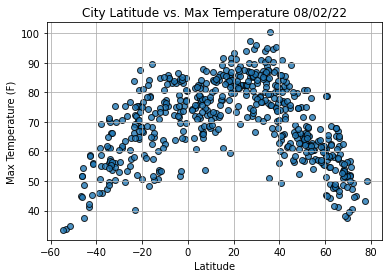

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

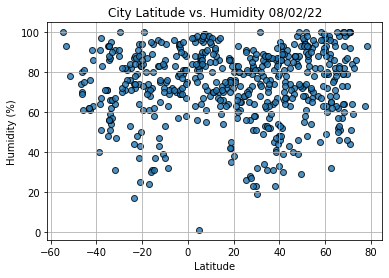

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

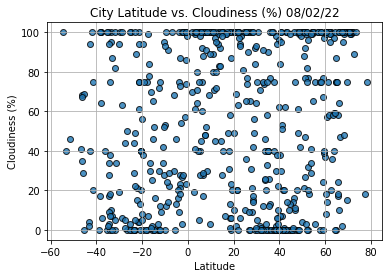

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

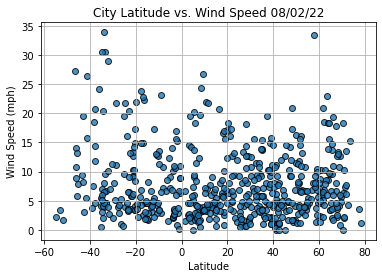

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()